In [41]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

fp = "G:\\My Drive\\Darby Work\\XRF fundamentals vs. MVA\\"

In [63]:
# import RMSE-CV results
rmsecv_results = pd.read_excel(fp+"Olympus_MVA_RMSEs_100621.xlsx", sheet_name="lasso all", header=1)
rmsecv_results.rename(columns={'RMSE-CV':'all_RMSE-CV'}, inplace=True)
# fix excel formatting
odd_rows = [num for num in rmsecv_results.index if num % 2 == 1]

for row in odd_rows:
    rmsecv_results.loc[row, 'Element'] = rmsecv_results.loc[row-1]['Element']
    rmsecv_results.loc[row, 'Limit'] = rmsecv_results.loc[row-1]['Limit']

# import RMSE-P results
rmsep_results = pd.read_csv(fp+"full_results_table.csv")
rmsep_results = rmsep_results[rmsep_results['num_range'] == '0-750']
rmsep_results.rename(columns={'RMSEP':'0-750_RMSEP'}, inplace=True)

In [64]:
results = pd.merge(rmsecv_results, 
                   rmsep_results, 
                   how='inner', 
                   left_on=['Element', 'Beam'], 
                   right_on=['element', 'filter'])[
    ['element', 'filter', 'all_RMSE-CV', '0-750_RMSEP']
]

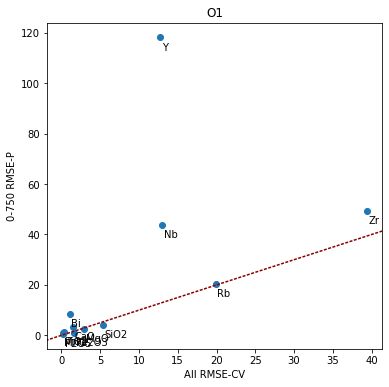

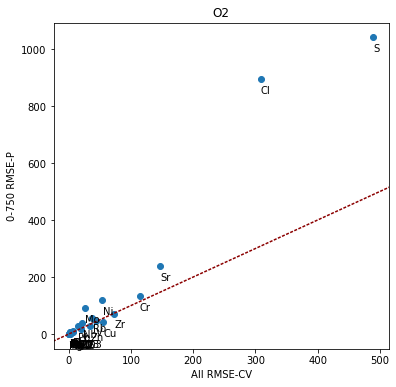

In [87]:
for beam in ['O1', 'O2']:
    
    df = results[results['filter']==beam]
    
###### results for Cu and S were super high for beam 1 so ignoring here #####
    if beam == 'O1':
        df = df[
            ~df['element'].isin(['Cu', 'Sr'])
        ]
    
    fig, ax = plt.subplots(1, figsize = (6,6))
    ax.scatter(df['all_RMSE-CV'], df['0-750_RMSEP'])
    
    # 1:1 line
    y_bot, y_top = plt.ylim() # get current auto-axes
    x_bot, x_top = plt.xlim()
    top = max(y_top, x_top)
    bot = min(y_bot, x_bot, 0)
    plt.xlim(x_bot, x_top) # reset to original axes
    plt.ylim(y_bot, y_top)
    one_one = ax.plot([bot,top], [bot,top], c='darkred', linewidth=1.5, linestyle = (0, (2, 1)), label = "1:1")

    # add labels
    offset = 50 if beam == 'O2' else 5
    
    for i in df.index:
        if df.loc[i].isnull().values.any():
            continue
        else: ax.text(df['all_RMSE-CV'][i]+.2, df['0-750_RMSEP'][i]-offset, df['element'][i])
    
    ax.set_xlabel('All RMSE-CV')
    ax.set_ylabel('0-750 RMSE-P')
    plt.title(beam)
    plt.show()